In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
# Load the PyTorch Results
pyt_sync_df_1 = pd.read_csv("results/pytorch/sync-one-gpu.csv")
pyt_sync_df_ds_1 = pd.read_csv("results/pytorch/sync-one-gpu-ds.csv")

# Load the TGI Results
tgi_sync_df_1 = pd.read_csv("results/TGI/sync-one-gpu.csv")

# Load the ONNX Results
onnx_sync_df_1 = pd.read_csv("results/onnx/sync-one-gpu.csv")
onnx_sync_ds_df_1 = pd.read_csv("results/onnx/sync-one-gpu-ds.csv")

In [112]:
# Calculating average latencies
pyt_avg = pyt_sync_df_1["inference_time"].mean()
pyt_avg_ds = pyt_sync_df_ds_1["inference_time"].mean()
tgi_avg = tgi_sync_df_1["inference_time"].mean()
onnx_avg = onnx_sync_df_1["inference_time"].mean()
onnx_avg_ds = onnx_sync_ds_df_1["inference_time"].mean()

# Calculating standard deviations
pyt_std = pyt_sync_df_1["inference_time"].mean()
pyt_std_ds = pyt_sync_df_ds_1["inference_time"].std()
tgi_std = tgi_sync_df_1["inference_time"].std()
onnx_std = onnx_sync_df_1["inference_time"].std()
onnx_std_ds = onnx_sync_ds_df_1["inference_time"].std()

print("PyTorch Average Latency Per Request", pyt_avg, "STD", pyt_std)
print("PyTorch+DeepSpeed Average Latency Per Request", pyt_avg_ds, "STD", pyt_std_ds)
print("TGI Average Latency Per Request", tgi_avg, "STD", tgi_std)
print("ONNX Average Latency Per Request", onnx_avg, "STD", onnx_std)
print("ONNX+DS Average Latency Per Request", onnx_avg_ds, "STD", onnx_std_ds)



PyTorch Average Latency Per Request 2.7624660058129105 STD 2.7624660058129105
PyTorch+DeepSpeed Average Latency Per Request 2.869086161591953 STD 1.4319061743661015
TGI Average Latency Per Request 8.25157434241216 STD 14.882666409089778
ONNX Average Latency Per Request 3.120656058304292 STD 1.6530459592038433
ONNX+DS Average Latency Per Request 3.0755805377673386 STD 1.6692047052691372


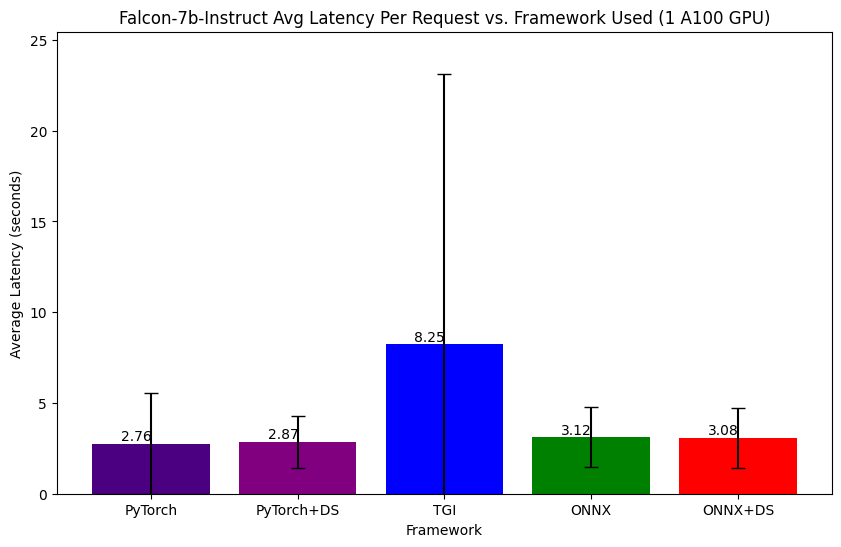

In [113]:
models = ['PyTorch', 'PyTorch+DS', 'TGI', 'ONNX', 'ONNX+DS']

# Data setup
avg_latencies = [pyt_avg, pyt_avg_ds, tgi_avg, onnx_avg, onnx_avg_ds]
stds = [pyt_std, pyt_std_ds, tgi_std, onnx_std, onnx_std_ds]

# Creating the bar graph with error bars
plt.figure(figsize=(10, 6))
bars = plt.bar(models, avg_latencies, yerr=stds, color=['indigo', 'purple', 'blue', 'green', 'red'], capsize=5)

# Adding the average latency values slightly to the right of each bar
for bar, avg_latency in zip(bars, avg_latencies):
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1,  # Slight right shift
             y_val, 
             f'{avg_latency:.2f}', 
             ha='center', 
             va='bottom')

# Setting up the plot
plt.xlabel('Framework')
plt.ylabel('Average Latency (seconds)')
plt.title('Falcon-7b-Instruct Avg Latency Per Request vs. Framework Used (1 A100 GPU)')
y_min, y_max = 0, max([avg + std for avg, std in zip(avg_latencies, stds)])
plt.ylim(y_min, y_max * 1.1)

# Display the graph
plt.show()


In [114]:
# Load the TGI Results
tgi_sync_df_1 = pd.read_csv("results/TGI/sync-one-gpu.csv")
tgi_sync_df_2 = pd.read_csv("results/TGI/sync-two-gpu-V100.csv")

# Calculating average latencies
tgi_avg_1 = tgi_sync_df_1["inference_time"].mean()
tgi_avg_2 = tgi_sync_df_2["inference_time"].mean()

# Calculating standard deviations
tgi_std_1 = tgi_sync_df_1["inference_time"].std()
tgi_std_2 = tgi_sync_df_2["inference_time"].std()


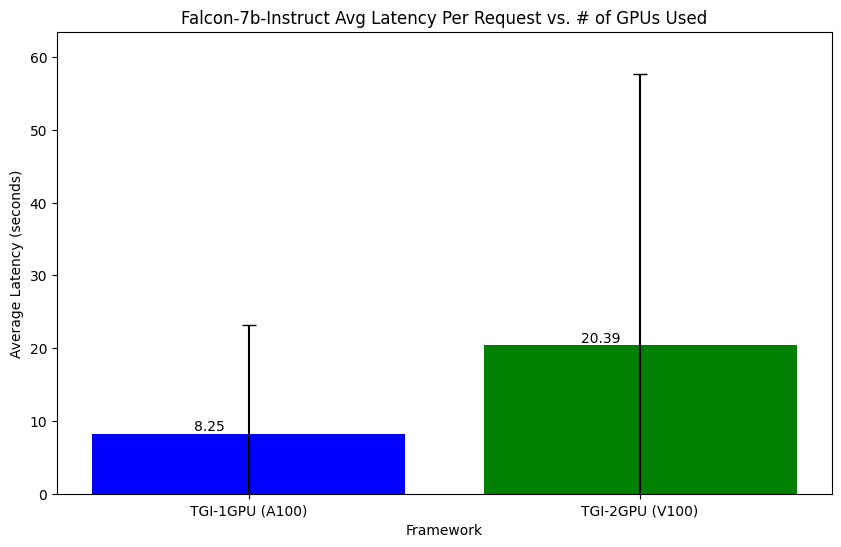

In [115]:
models = ['TGI-1GPU (A100)', 'TGI-2GPU (V100)']

# Data setup
avg_latencies = [tgi_avg_1, tgi_avg_2]
stds = [tgi_std_1, tgi_std_2]

# Creating the bar graph with error bars
plt.figure(figsize=(10, 6))
bars = plt.bar(models, avg_latencies, yerr=stds, color=['blue', 'green'], capsize=5)

# Adding the average latency values slightly to the right of each bar
for bar, avg_latency in zip(bars, avg_latencies):
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1,  # Slight right shift
             y_val, 
             f'{avg_latency:.2f}', 
             ha='center', 
             va='bottom')

# Setting up the plot
plt.xlabel('Framework')
plt.ylabel('Average Latency (seconds)')
plt.title('Falcon-7b-Instruct Avg Latency Per Request vs. # of GPUs Used')
y_min, y_max = 0, max([avg + std for avg, std in zip(avg_latencies, stds)])
plt.ylim(y_min, y_max * 1.1)

# Display the graph
plt.show()


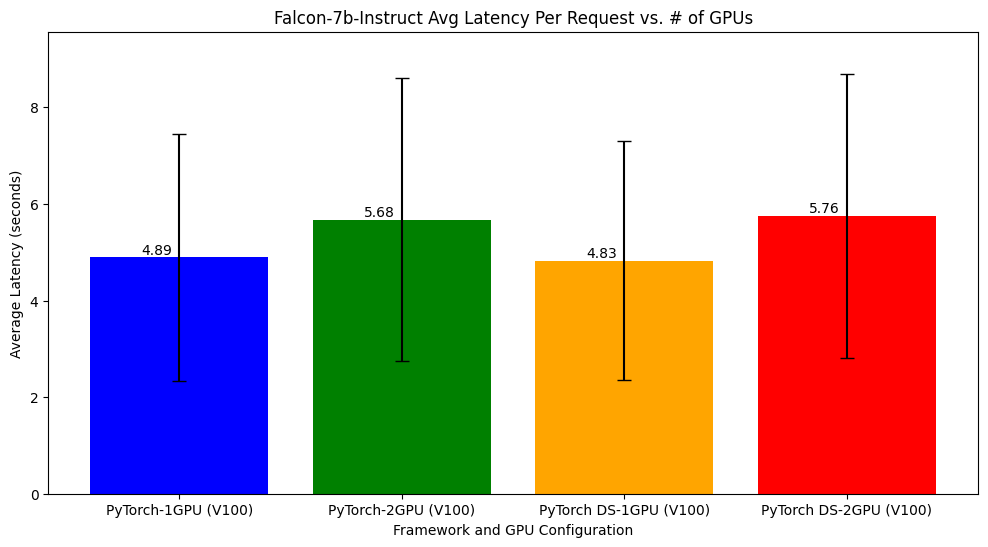

In [116]:
# Load the data
pytorch_1gpu_df = pd.read_csv('./results/pytorch/sync-one-gpu-V100.csv')
pytorch_2gpu_df = pd.read_csv('./results/pytorch/sync-two-gpu-V100.csv')
pytorch_ds_1gpu_df = pd.read_csv('./results/pytorch/sync-one-gpu-V100-ds.csv')
pytorch_ds_2gpu_df = pd.read_csv('./results/pytorch/sync-two-gpu-V100-ds.csv')

# Calculate average latencies and standard deviations
avg_latency_pytorch_1gpu = pytorch_1gpu_df["inference_time"].mean()
std_pytorch_1gpu = pytorch_1gpu_df["inference_time"].std()

avg_latency_pytorch_2gpu = pytorch_2gpu_df["inference_time"].mean()
std_pytorch_2gpu = pytorch_2gpu_df["inference_time"].std()

avg_latency_pytorch_ds_1gpu = pytorch_ds_1gpu_df["inference_time"].mean()
std_pytorch_ds_1gpu = pytorch_ds_1gpu_df["inference_time"].std()

avg_latency_pytorch_ds_2gpu = pytorch_ds_2gpu_df["inference_time"].mean()
std_pytorch_ds_2gpu = pytorch_ds_2gpu_df["inference_time"].std()

# Data for graph
models = ['PyTorch-1GPU (V100)', 'PyTorch-2GPU (V100)', 'PyTorch DS-1GPU (V100)', 'PyTorch DS-2GPU (V100)']
avg_latencies = [avg_latency_pytorch_1gpu, avg_latency_pytorch_2gpu, avg_latency_pytorch_ds_1gpu, avg_latency_pytorch_ds_2gpu]
stds = [std_pytorch_1gpu, std_pytorch_2gpu, std_pytorch_ds_1gpu, std_pytorch_ds_2gpu]

# Creating the bar graph with error bars
plt.figure(figsize=(12, 6))
bars = plt.bar(models, avg_latencies, yerr=stds, color=['blue', 'green', 'orange', 'red'], capsize=5)

# Adding the average latency values on top of each bar
for bar, avg_latency in zip(bars, avg_latencies):
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, y_val, f'{avg_latency:.2f}', ha='center', va='bottom')

# Setting up the plot
plt.xlabel('Framework and GPU Configuration')
plt.ylabel('Average Latency (seconds)')
plt.title('Falcon-7b-Instruct Avg Latency Per Request vs. # of GPUs')
y_min, y_max = 0, max([avg + std for avg, std in zip(avg_latencies, stds)])
plt.ylim(y_min, y_max * 1.1)

# Display the graph
plt.show()

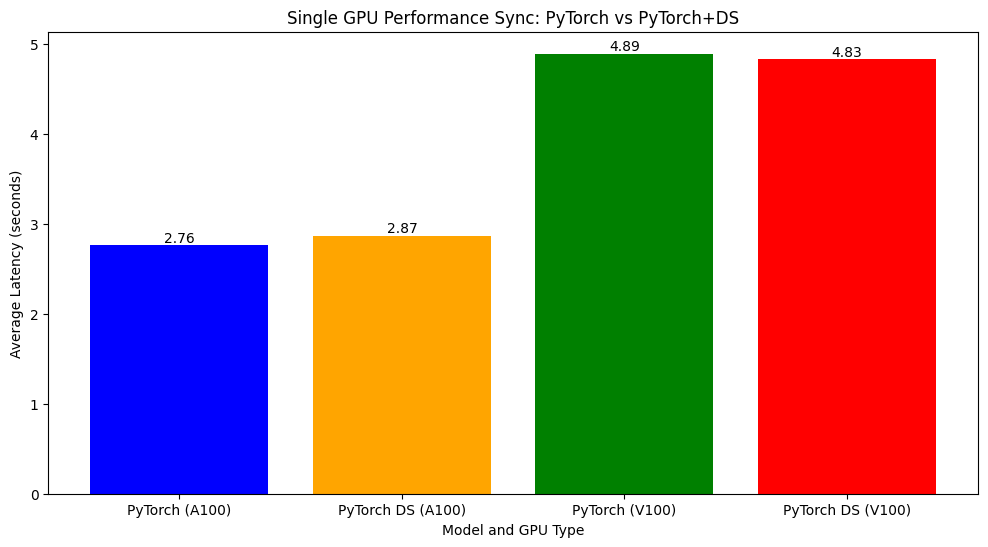

In [117]:
# Loading the data
pytorch_a100_df = pd.read_csv('./results/pytorch/sync-one-gpu.csv')
pytorch_ds_a100_df = pd.read_csv('./results/pytorch/sync-one-gpu-ds.csv')
pytorch_v100_df = pd.read_csv('./results/pytorch/sync-one-gpu-V100.csv')
pytorch_ds_v100_df = pd.read_csv('./results/pytorch/sync-one-gpu-V100-ds.csv')

# Calculating average latencies
avg_latency_pytorch_a100 = pytorch_a100_df["inference_time"].mean()
avg_latency_pytorch_ds_a100 = pytorch_ds_a100_df["inference_time"].mean()
avg_latency_pytorch_v100 = pytorch_v100_df["inference_time"].mean()
avg_latency_pytorch_ds_v100 = pytorch_ds_v100_df["inference_time"].mean()

# Data for graph
models = ['PyTorch (A100)', 'PyTorch DS (A100)', 'PyTorch (V100)', 'PyTorch DS (V100)']
avg_latencies = [avg_latency_pytorch_a100, avg_latency_pytorch_ds_a100, 
                 avg_latency_pytorch_v100, avg_latency_pytorch_ds_v100]

# Creating the bar graph
plt.figure(figsize=(12, 6))
bars = plt.bar(models, avg_latencies, color=['blue', 'orange', 'green', 'red'])

# Adding the average latency values on top of each bar
for bar, avg_latency in zip(bars, avg_latencies):
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val, f'{avg_latency:.2f}', 
             ha='center', va='bottom')
             
plt.xlabel('Model and GPU Type')
plt.ylabel('Average Latency (seconds)')
plt.title('Single GPU Performance Sync: PyTorch vs PyTorch+DS')
plt.show()


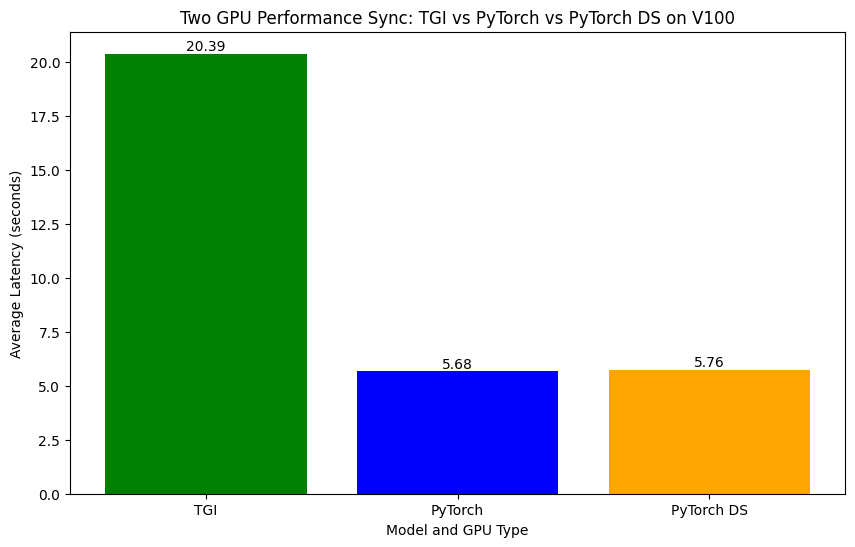

In [118]:
# Loading the data
tgi_v100_df = pd.read_csv('./results/TGI/sync-two-gpu-V100.csv')
pytorch_v100_df = pd.read_csv('./results/pytorch/sync-two-gpu-V100.csv')
pytorch_ds_v100_df = pd.read_csv('./results/pytorch/sync-two-gpu-V100-ds.csv')

# Calculating average latencies
avg_latency_tgi_v100 = tgi_v100_df["inference_time"].mean()
avg_latency_pytorch_v100 = pytorch_v100_df["inference_time"].mean()
avg_latency_pytorch_ds_v100 = pytorch_ds_v100_df["inference_time"].mean()

# Data for graph
models = ['TGI', 'PyTorch', 'PyTorch DS']
avg_latencies = [avg_latency_tgi_v100, avg_latency_pytorch_v100, avg_latency_pytorch_ds_v100]

# Creating the bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(models, avg_latencies, color=['green', 'blue', 'orange'])

# Adding the average latency values on top of each bar
for bar, avg_latency in zip(bars, avg_latencies):
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val, f'{avg_latency:.2f}', 
             ha='center', va='bottom')

# Setting up the plot
plt.xlabel('Model and GPU Type')
plt.ylabel('Average Latency (seconds)')
plt.title('Two GPU Performance Sync: TGI vs PyTorch vs PyTorch DS on V100')

# Display the graph
plt.show()


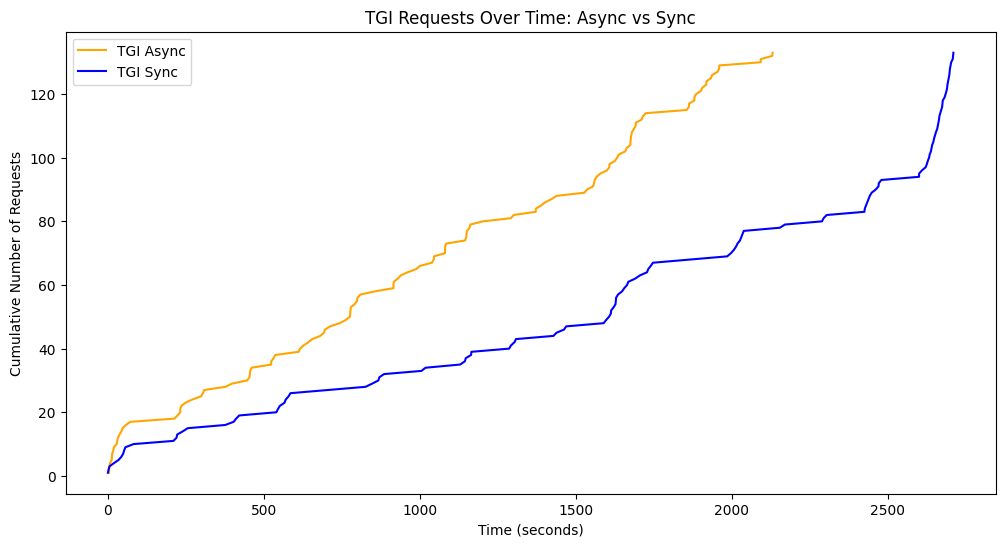

In [119]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
async_df = pd.read_csv('./results/TGI/async-two-gpu-V100.csv')
sync_df = pd.read_csv('./results/TGI/sync-two-gpu-V100.csv')

# Process the async data
async_df_sorted = async_df.sort_values(by='inference_time')
async_df_sorted['cumulative_requests'] = range(1, len(async_df_sorted) + 1)

# Process the sync data
sync_df['timestamp'] = pd.to_datetime(sync_df['timestamp'])
# Set the starting point as the first timestamp
start_time = sync_df['timestamp'].iloc[0]
# Calculate the time difference in seconds
sync_df['seconds_since_start'] = (sync_df['timestamp'] - start_time).dt.total_seconds()
sync_df['cumulative_requests'] = range(1, len(sync_df) + 1)

# Creating the line graph
plt.figure(figsize=(12, 6))
plt.plot(async_df_sorted['inference_time'], async_df_sorted['cumulative_requests'], label='TGI Async', color='orange')
plt.plot(sync_df['seconds_since_start'], sync_df['cumulative_requests'], label='TGI Sync', color='blue')

# Setting up the plot
plt.xlabel('Time (seconds)')
plt.ylabel('Cumulative Number of Requests')
plt.title('TGI Requests Over Time: Async vs Sync')
plt.legend()

# Display the graph
plt.show()
